In [96]:
import pandas as pd
import sklearn
import numpy as np

print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Numpy version: {np.__version__}")


Pandas version: 2.3.3
Scikit-learn version: 1.7.2
Numpy version: 2.3.3


In [97]:

# --- Загальний блок імпорту ---

# 1. Робота з даними
import numpy as np
import pandas as pd

# 2. Візуалізація
import matplotlib.pyplot as plt
import seaborn as sns # (Додатково для кращих візуалізацій)

# 3. Генерація даних
from sklearn.datasets import make_regression # (Для Завдання 1)

# 4. Модель та її підготовка
from sklearn.linear_model import LinearRegression # (Основна модель)
from sklearn.model_selection import train_test_split # (Для Завдання 2)

# 5. Оцінка моделі
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Налаштування візуалізацій
plt.style.use('ggplot')


In [98]:
# --- Завдання 1: Генерація даних ---
X_gen, y_gen = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=15.0,
    random_state=42  # random_state для відтворюваності результатів
)

# Перетворимо на pandas.DataFrame для зручності та уніфікації
df_gen = pd.DataFrame({'X_Feature': X_gen.flatten(), 'y_Target': y_gen})

# Підготовка змінних для моделі 
X_gen = df_gen[['X_Feature']]
y_gen = df_gen

print("Перші n рядків згенерованих даних (Завдання 1):")
print(df_gen.head(10))


Перші n рядків згенерованих даних (Завдання 1):
   X_Feature   y_Target
0   0.931280  56.733566
1   0.087047 -16.914625
2  -1.057711 -30.302579
3   0.314247   9.231600
4  -0.479174 -16.606936
5   0.647689  33.829277
6  -0.463418 -35.431542
7   0.542560  -2.455516
8   0.611676  22.444041
9   1.003533  27.571108


In [99]:
# --- Завдання 1: Моделювання ---

# 1. Створення і навчання моделі
model_gen = LinearRegression()
model_gen.fit(X_gen, y_gen)

# 2. Передбачення значень
y_gen_pred = model_gen.predict(X_gen)

# 3. Оцінка моделі
mse_gen = mean_squared_error(y_gen, y_gen_pred)
mae_gen = mean_absolute_error(y_gen, y_gen_pred)
r2_gen = r2_score(y_gen, y_gen_pred)

print("--- Результати Завдання 1 (make_regression) ---")
print(f"Середньоквадратична похибка (MSE): {mse_gen:.2f}")
print(f"Середня абсолютна похибка (MAE): {mae_gen:.2f}")
print(f"Коефіцієнт детермінації (R^2): {r2_gen:.2f}")


--- Результати Завдання 1 (make_regression) ---
Середньоквадратична похибка (MSE): 87.81
Середня абсолютна похибка (MAE): 5.33
Коефіцієнт детермінації (R^2): 0.95


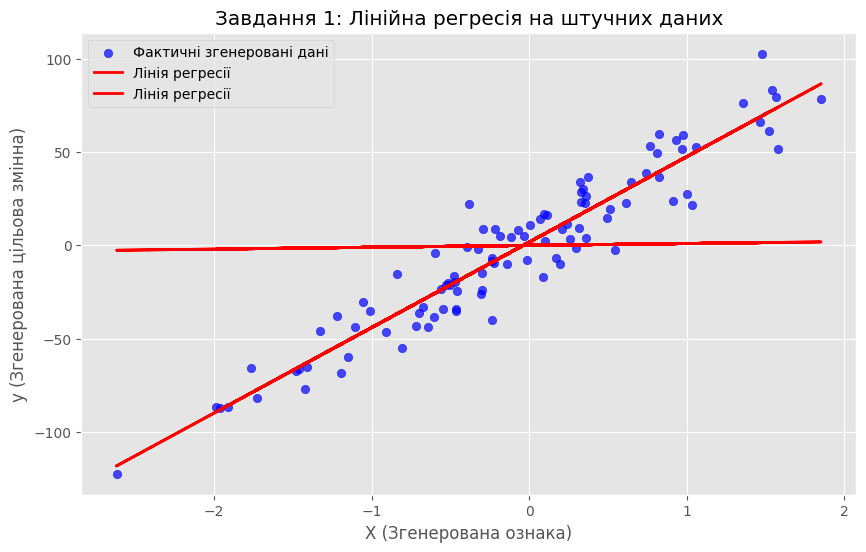

In [100]:

# --- Завдання 1: Візуалізація (Виправлено) ---
plt.figure(figsize=(10, 6))

# x = X_gen.iloc[:, 0]  (Перший стовпець, наприклад 'X_Feature')
# y = y_gen.iloc[:, 1]  (Другий стовпець, наприклад 'y_Target')
plt.scatter(X_gen.iloc[:, 0], y_gen.iloc[:, 1], color='blue', label='Фактичні згенеровані дані', alpha=0.7)

# Для лінії регресії ми все ще використовуємо ПЕРШИЙ стовпець для X
plt.plot(X_gen.iloc[:, 0], y_gen_pred, color='red', linewidth=2, label='Лінія регресії')

plt.xlabel('X (Згенерована ознака)')
plt.ylabel('y (Згенерована цільова змінна)')
plt.title('Завдання 1: Лінійна регресія на штучних даних')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
# --- Завдання 2: Завантаження та Підготовка Даних ---
try:
    # Завантаження даних 
    df_kaggle = pd.read_csv('Student_Performance.csv') #
except FileNotFoundError:
    print("ПОМИЛКА: Файл 'Student_Performance.csv' не знайдено.")
    print("Будь ласка, переконайтеся, що він знаходиться в тій самій теці, що і ваш блокнот.")
    # Створення заглушки, щоб уникнути подальших помилок
    df_kaggle = pd.DataFrame() 

if not df_kaggle.empty:
    print("Перші 5 рядків даних ('Student_Performance.csv'):")
    print(df_kaggle.head())
    
    # --- Попередня обробка: Категоріальні дані ---
    # Модель LinearRegression вимагає, щоб усі вхідні дані були числовими.
    # Стовпець 'Extracurricular Activities' має значення 'Yes'/'No'. 
    # Ми перетворимо його на 1 ('Yes') та 0 ('No').
    df_kaggle['Extracurricular Activities'] = df_kaggle['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
    
    print("\nДані після перетворення 'Extracurricular Activities':")
    print(df_kaggle.head())

    # --- Вибір Ознак (Feature Selection) ---
    # Наша мета: спрогнозувати 'Performance Index' 
    # Ми оберемо всі інші стовпці як ознаки (X)
    features = ["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced" ]
    target = 'Performance Index' 

    X_kaggle = df_kaggle[features]
    y_kaggle = df_kaggle[target]

    # --- Розділення Даних ---
    # Це найкраща практика: навчати модель на одних даних (train),
    # а перевіряти її якість на інших, "небачених" (test).
    # Ми використаємо 80% даних для навчання і 20% для тесту.
    X_train, X_test, y_train, y_test = train_test_split(
        X_kaggle, 
        y_kaggle, 
        test_size=0.5, 
        random_state=42
    )
    
    print(f"\nРозмір навчального набору (X_train): {X_train.shape}")
    print(f"Розмір тестового набору (X_test): {X_test.shape}")

Перші 5 рядків даних ('Student_Performance.csv'):
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Дані після перетворення 'Extracurricular Activities':
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0           

In [102]:
# --- Завдання 2: Моделювання на реальних даних ---

# 1. Створення і навчання моделі (на навчальних даних) 
model_kaggle = LinearRegression()
model_kaggle.fit(X_train, y_train) #

# 2. Передбачення значень (для тестових даних) 
y_kaggle_pred = model_kaggle.predict(X_test) #

# 3. Оцінка моделі (порівнюємо y_test з y_kaggle_pred) 
mse_kaggle = mean_squared_error(y_test, y_kaggle_pred)
mae_kaggle = mean_absolute_error(y_test, y_kaggle_pred)
r2_kaggle = r2_score(y_test, y_kaggle_pred) #

print("\n--- Результати Завдання 2 (Student_Performance.csv) ---")
print(f"Середньоквадратична похибка (MSE): {mse_kaggle:.2f}")
print(f"Середня абсолютна похибка (MAE): {mae_kaggle:.2f}")
print(f"Коефіцієнт детермінації (R^2): {r2_kaggle:.2f}")

# --- Аналіз Коефіцієнтів Моделі ---
# Це показує "важливість" кожної ознаки для моделі
print("\nКоефіцієнти моделі (вплив кожної ознаки):")
# Створюємо DataFrame для зручного перегляду коефіцієнтів
coef_df = pd.DataFrame(model_kaggle.coef_, index=features, columns=['Coefficient'])
print(coef_df)


--- Результати Завдання 2 (Student_Performance.csv) ---
Середньоквадратична похибка (MSE): 4.20
Середня абсолютна похибка (MAE): 1.63
Коефіцієнт детермінації (R^2): 0.99

Коефіцієнти моделі (вплив кожної ознаки):
                                  Coefficient
Hours Studied                        2.857959
Previous Scores                      1.016300
Extracurricular Activities           0.594940
Sleep Hours                          0.473556
Sample Question Papers Practiced     0.181300


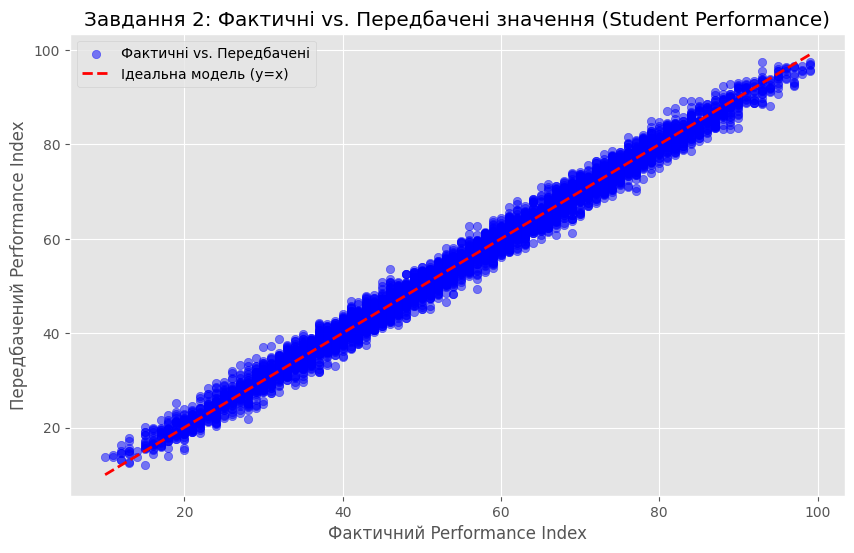

In [103]:
# --- Завдання 2: Візуалізація --- 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_kaggle_pred, color='blue', alpha=0.5, label='Фактичні vs. Передбачені')

# Додаємо ідеальну лінію (y=x) для порівняння
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ідеальна модель (y=x)')
plt.xlabel('Фактичний Performance Index')
plt.ylabel('Передбачений Performance Index')
plt.title("Завдання 2: Фактичні vs. Передбачені значення (Student Performance)")
plt.legend()
plt.show()

In [104]:
# --- Завдання 3: Генерація даних "вручну" ---
np.random.seed(42)  # Для відтворюваності [11, 10]

N_SAMPLES = 100
TRUE_M = 2.5  # Справжній нахил
TRUE_C = 5.0  # Справжня точка перетину (intercept)

# 1. Генеруємо 100 значень X від 0 до 1 [2]
X_numpy = np.random.rand(N_SAMPLES, 1)

# 2. Генеруємо "ідеальний" y без шуму
y_numpy_ideal = (TRUE_M * X_numpy) + TRUE_C

# 3. Генеруємо шум (з нормального розподілу) [13]
noise = np.random.normal(loc=0.0, scale=0.1, size=(N_SAMPLES, 1))

# 4. Додаємо шум до ідеального y, щоб отримати фінальний y [9, 12]
y_numpy = y_numpy_ideal + noise

# Перетворення на DataFrame для узгодженості
df_numpy = pd.DataFrame({'X': X_numpy.flatten(), 'y': y_numpy.flatten()})
X_numpy_df = df_numpy[['X']]
y_numpy_df = df_numpy['y']

print("Перші 5 рядків даних, згенерованих 'вручну':")
print(df_numpy.head())

Перші 5 рядків даних, згенерованих 'вручну':
          X         y
0  0.374540  5.945055
1  0.950714  7.346885
2  0.731994  6.839161
3  0.598658  6.297889
4  0.156019  5.368079


In [105]:
# --- Завдання 3: Моделювання ---

# 1. Створення і навчання моделі 
model_numpy = LinearRegression()
model_numpy.fit(X_numpy_df, y_numpy_df) # ВИПРАВЛЕНО: Посилання  переміщено в коментар

# 2. Передбачення значень
y_numpy_pred = model_numpy.predict(X_numpy_df)

# 3. Оцінка моделі
mse_numpy = mean_squared_error(y_numpy_df, y_numpy_pred)
mae_numpy = mean_absolute_error(y_numpy_df, y_numpy_pred)
r2_numpy = r2_score(y_numpy_df, y_numpy_pred)

print("\n--- Результати Завдання 3 (NumPy 'вручну') ---")
print(f"Середньоквадратична похибка (MSE): {mse_numpy:.2f}")
print(f"Середня абсолютна похибка (MAE): {mae_numpy:.2f}")
print(f"Коефіцієнт детермінації (R^2): {r2_numpy:.2f}")


--- Результати Завдання 3 (NumPy 'вручну') ---
Середньоквадратична похибка (MSE): 0.01
Середня абсолютна похибка (MAE): 0.07
Коефіцієнт детермінації (R^2): 0.98


In [106]:
# --- Завдання 3: Перевірка Коефіцієнтів ---
found_m = model_numpy.coef_
found_c = model_numpy.intercept_

print("\n--- Порівняння Коефіцієнтів (Завдання 3) ---")

# ВИПРАВЛЕНО: Додано [0] для доступу до числа всередині масиву numpy 
print(f"Знайдений нахил (m): {found_m[0]:.2f} (Реальний: {TRUE_M})")

# Примітка: 'found_c' (intercept_) часто вже є скаляром (простим числом),
# але якщо він також є масивом, йому теж може знадобитися [0].
# Якщо 'found_c' вже є числом, цей рядок працюватиме:
print(f"Знайдена точка перетину (c): {found_c:.2f} (Реальна: {TRUE_C})")


--- Порівняння Коефіцієнтів (Завдання 3) ---
Знайдений нахил (m): 2.45 (Реальний: 2.5)
Знайдена точка перетину (c): 5.02 (Реальна: 5.0)


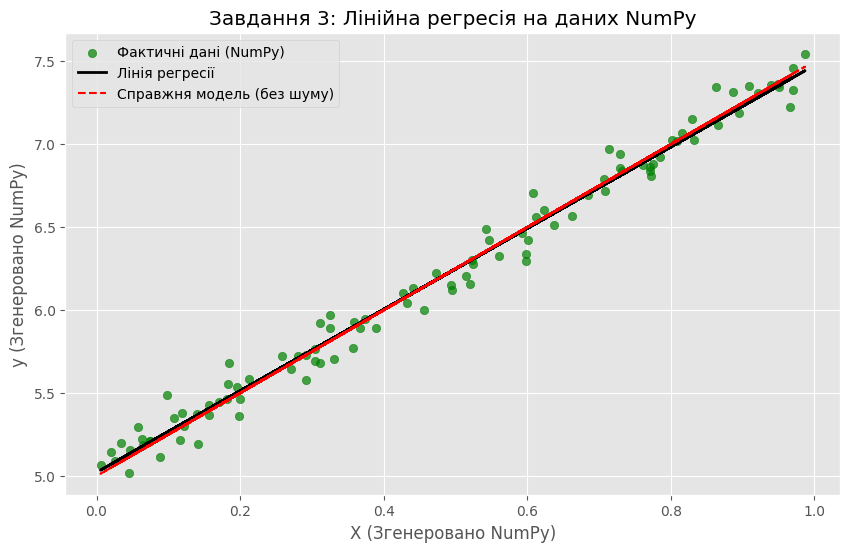

In [107]:
# --- Завдання 3: Візуалізація ---
plt.figure(figsize=(10, 6))
plt.scatter(X_numpy_df, y_numpy_df, color='green', label='Фактичні дані (NumPy)', alpha=0.7)
plt.plot(X_numpy_df, y_numpy_pred, color='black', linewidth=2, label='Лінія регресії')
# Додамо "справжню" лінію, яку ми заклали
plt.plot(X_numpy_df, y_numpy_ideal, color='red', linestyle='--', label='Справжня модель (без шуму)')
plt.xlabel('X (Згенеровано NumPy)')
plt.ylabel('y (Згенеровано NumPy)')
plt.title('Завдання 3: Лінійна регресія на даних NumPy')
plt.legend()
plt.show()